In [1]:
import torch, os
import pandas as pd
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
from torch.utils.data import Dataset

2024-04-12 13:39:26.112506: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 13:39:26.112655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 13:39:26.271957: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
# import pandas as pd

# # Read data from the specific sheet named "modified_data"
# # df_org = pd.read_csv("/kaggle/input/testrun01/DatasetForGita.csv", sheet_name="modified_data")
# df_org = pd.read_csv("/kaggle/input/testrun01/DatasetForGita.csv")

# # Shuffle the data
# df_org = df_org.sample(frac=1.0, random_state=42)

# # Display the first few rows of the DataFrame
# print(df_org.head())

In [4]:
import pandas as pd

# Read data from the "modified_data" sheet
df_modified = pd.read_excel("/kaggle/input/testdataset2/DatasetForGita.xlsx", sheet_name="modified_data")

# Read data from the "25K" sheet
df_25k = pd.read_excel("/kaggle/input/testdataset2/DatasetForGita.xlsx", sheet_name="25K")

# Shuffle the data in both dataframes
df_modified = df_modified.sample(frac=1.0, random_state=42)
df_25k = df_25k.sample(frac=1.0, random_state=42)

# Merge both dataframes
df_org = pd.concat([df_modified, df_25k], ignore_index=True)

# Display the first few rows of the merged DataFrame
print(df_org.head())

                                                Text     Emotion label_column  \
0  আত্মা অপ্রকাশিত, সমস্ত চিন্তার উর্ধ্বে, সমস্ত ...  Idealistic          NaN   
1  পবিত্র লিপির বহুগুণে বিহ্বল বুদ্ধি যখন অনন্তের...    Surprise          NaN   
2                                অতএব, দুঃখ করবেন না  Optimistic          NaN   
3                 শাস্ত্রে তিনটি গুণের বর্ণনা রয়েছে  Idealistic          NaN   
4            তাদের জন্য পুনর্জন্ম বা মৃত্যুর ভয় নেই  Idealistic          NaN   

  score_column  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


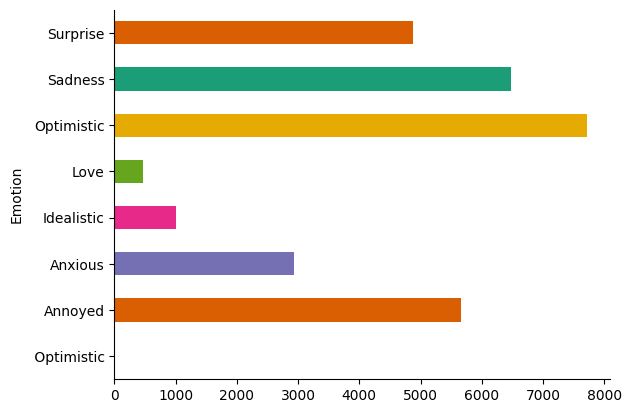

In [68]:
from matplotlib import pyplot as plt
import seaborn as sns
df_org.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [69]:
!pip install bangla-stemmer

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
from bangla_stemmer.stemmer import stemmer

stmr = stemmer.BanglaStemmer()

valid_bangla_char = set(['া','ি','ী','ু','ূ','ৃ','ে','ৈ','ো','ৌ','ক','খ',
'গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন',
'প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়','ৎ','ং','ঃ'
'‍ঁ','‍্','‍্য','‍‍্র','‍‍র্ক','‍্ব','৺','ক্ষ','জ্ঞ','অ','আ','ই','ঈ','উ','ঊ','ঋ','এ',
'ঐ','ও','ঔ','অ্যা','্','য়','ঁ','ড়','়','ঃ'])

stop_words = set([''])
stop_words_file_lines=open('/kaggle/input/stopwordscheck/stop_words.txt','r',encoding='utf-8-sig').readlines()
for word in stop_words_file_lines:
    stop_words.add(word.strip())

def puncuation_removal(sentence):
    words = sentence.split()
    unique_words_per_sentence = []
    for every_word in words:
        correct_word = ''
        for each_char in every_word:
            if each_char in valid_bangla_char:
                correct_word += each_char
            else:
                correct_word = ''
        if correct_word not in stop_words:
            unique_words_per_sentence.append(correct_word.strip())
        correct_word = ''

    new_refined_sentence = ' '.join(stmr.stem(unique_words_per_sentence))

    return new_refined_sentence

df_org["text_clean"] = df_org["Text"].apply(lambda x: puncuation_removal(x))
df_org.head()

applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied third rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
appl

In [5]:
labels = df_org['Emotion'].unique().tolist()
labels = [s.strip() for s in labels ]
labels

['Idealistic',
 'Surprise',
 'Optimistic',
 'Love',
 'Sadness',
 'Annoyed',
 'Anxious',
 'Optimistic']

In [6]:
for key, value in enumerate(labels):
    print(value)

Idealistic
Surprise
Optimistic
Love
Sadness
Annoyed
Anxious
Optimistic


In [7]:
NUM_LABELS= len(labels)

id2label={id:label for id,label in enumerate(labels)}

label2id={label:id for id,label in enumerate(labels)}

In [8]:
label2id

{'Idealistic': 0,
 'Surprise': 1,
 'Optimistic': 7,
 'Love': 3,
 'Sadness': 4,
 'Annoyed': 5,
 'Anxious': 6}

In [9]:
id2label

{0: 'Idealistic',
 1: 'Surprise',
 2: 'Optimistic',
 3: 'Love',
 4: 'Sadness',
 5: 'Annoyed',
 6: 'Anxious',
 7: 'Optimistic'}

In [10]:
df_org.head()

,Text,Emotion,label_column,score_column
0,"আত্মা অপ্রকাশিত, সমস্ত চিন্তার উর্ধ্বে, সমস্ত ...",Idealistic,NaN,NaN
1,পবিত্র লিপির বহুগুণে বিহ্বল বুদ্ধি যখন অনন্তের...,Surprise,NaN,NaN
2,"অতএব, দুঃখ করবেন না",Optimistic,NaN,NaN
3,শাস্ত্রে তিনটি গুণের বর্ণনা রয়েছে,Idealistic,NaN,NaN
4,তাদের জন্য পুনর্জন্ম বা মৃত্যুর ভয় নেই,Idealistic,NaN,NaN


In [11]:
df_org["labels"]=df_org.Emotion.map(lambda x: label2id[x.strip()])

In [12]:
df_org.head(30)

,Text,Emotion,label_column,score_column,labels
0,"আত্মা অপ্রকাশিত, সমস্ত চিন্তার উর্ধ্বে, সমস্ত ...",Idealistic,NaN,NaN,0
1,পবিত্র লিপির বহুগুণে বিহ্বল বুদ্ধি যখন অনন্তের...,Surprise,NaN,NaN,1
2,"অতএব, দুঃখ করবেন না",Optimistic,NaN,NaN,7
3,শাস্ত্রে তিনটি গুণের বর্ণনা রয়েছে,Idealistic,NaN,NaN,0
4,তাদের জন্য পুনর্জন্ম বা মৃত্যুর ভয় নেই,Idealistic,NaN,NaN,0
5,"হে অর্জুন, ভগবান, প্রতিটি প্রাণীর হৃদয়ে বাস ক...",Idealistic,Love,0.687427,0
6,এটা কেমন,Surprise,NaN,NaN,1
7,আপনি সবকিছু পরিব্যাপ্ত; তুমিই সব,Love,NaN,NaN,3
8,"ধ্যানের মাধ্যমে চেতনা একত্রিত হয়ে, তারা সমান ...",Idealistic,Surprise,0.579838,0
9,কিন্তু আলোকিত পুরুষ বা মহিলা গুনগুলির গুরুত্ব ...,Idealistic,Optimistic,0.877614,0


<Axes: ylabel='count'>

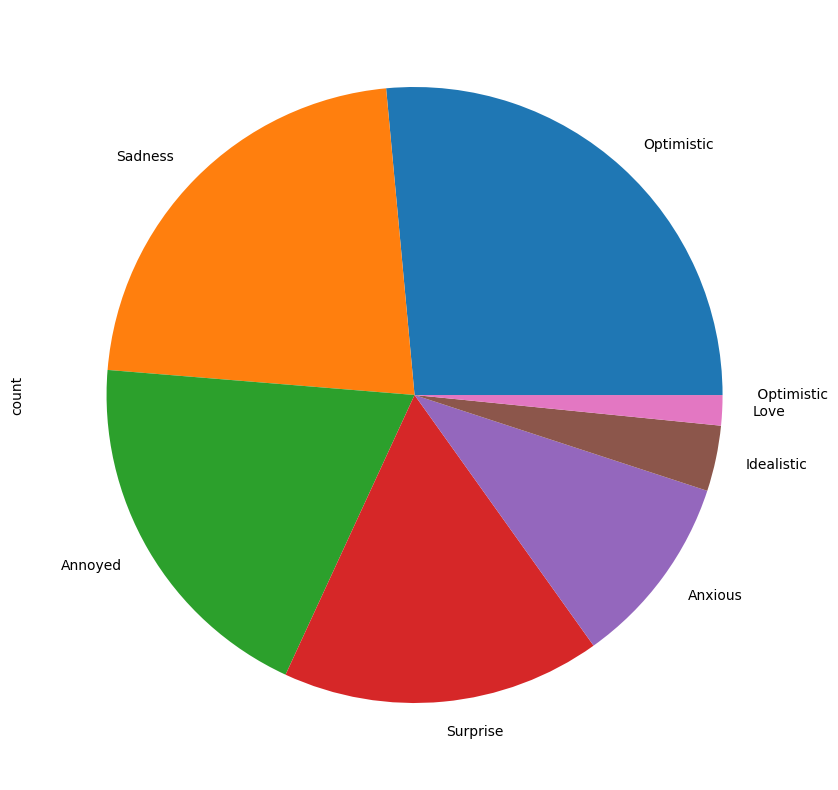

In [13]:
df_org.Emotion	.value_counts().plot(kind='pie', figsize=(10,10))

In [14]:
tokenizer = BertTokenizerFast.from_pretrained("sagorsarker/bangla-bert-base", max_length=512)

vocab.txt:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

In [15]:
model = BertForSequenceClassification.from_pretrained("sagorsarker/bangla-bert-base", num_labels=NUM_LABELS, id2label=id2label, label2id=label2id)
model.to(device)

model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(102025, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [16]:
SIZE= df_org.shape[0]

train_texts= list(df_org.Text[:SIZE//2])

val_texts=   list(df_org.Text[SIZE//2:(3*SIZE)//4 ])

test_texts=  list(df_org.Text[(3*SIZE)//4:])

train_labels= list(df_org.labels[:SIZE//2])

val_labels=   list(df_org.labels[SIZE//2:(3*SIZE)//4])

test_labels=  list(df_org.labels[(3*SIZE)//4:])

In [17]:
len(train_texts)

14568

In [18]:
len(train_texts), len(val_texts), len(test_texts)

(14568, 7284, 7284)

In [19]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [20]:
class DataLoader(Dataset):
    """
    Custom Dataset class for handling tokenized text data and corresponding labels.
    Inherits from torch.utils.data.Dataset.
    """
    def __init__(self, encodings, labels):
        """
        Initializes the DataLoader class with encodings and labels.

        Args:
            encodings (dict): A dictionary containing tokenized input text data
                              (e.g., 'input_ids', 'token_type_ids', 'attention_mask').
            labels (list): A list of integer labels for the input text data.
        """
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        """
        Returns a dictionary containing tokenized data and the corresponding label for a given index.

        Args:
            idx (int): The index of the data item to retrieve.

        Returns:
            item (dict): A dictionary containing the tokenized data and the corresponding label.
        """
        # Retrieve tokenized data for the given index
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Add the label for the given index to the item dictionary
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        """
        Returns the number of data items in the dataset.

        Returns:
            (int): The number of data items in the dataset.
        """
        return len(self.labels)

In [21]:
train_dataloader = DataLoader(train_encodings, train_labels)

val_dataloader = DataLoader(val_encodings, val_labels)

test_dataset = DataLoader(test_encodings, test_labels)

In [22]:
from transformers import TrainingArguments, Trainer

In [23]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    """
    Computes accuracy, F1, precision, and recall for a given set of predictions.
    
    Args:
        pred (obj): An object containing label_ids and predictions attributes.
            - label_ids (array-like): A 1D array of true class labels.
            - predictions (array-like): A 2D array where each row represents
              an observation, and each column represents the probability of 
              that observation belonging to a certain class.
              
    Returns:
        dict: A dictionary containing the following metrics:
            - Accuracy (float): The proportion of correctly classified instances.
            - F1 (float): The macro F1 score, which is the harmonic mean of precision
              and recall. Macro averaging calculates the metric independently for
              each class and then takes the average.
            - Precision (float): The macro precision, which is the number of true
              positives divided by the sum of true positives and false positives.
            - Recall (float): The macro recall, which is the number of true positives
              divided by the sum of true positives and false negatives.
    """
    # Extract true labels from the input object
    labels = pred.label_ids
    
    # Obtain predicted class labels by finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)
    
    # Compute macro precision, recall, and F1 score using sklearn's precision_recall_fscore_support function
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    
    # Calculate the accuracy score using sklearn's accuracy_score function
    acc = accuracy_score(labels, preds)
    
    # Return the computed metrics as a dictionary
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [24]:
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='/kaggle/working/TTC4900Model', 
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0 
    num_train_epochs=6,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,                
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory                 
    logging_dir='./kaggle/working/multi-class-logs',            
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps", 
    fp16=True,
    load_best_model_at_end=True
)

In [25]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned 
    model=model,
     # training arguments that we defined above                        
    args=training_args,                 
    train_dataset=train_dataloader,         
    eval_dataset=val_dataloader,            
    compute_metrics= compute_metrics
)

/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [26]:
trainer.train()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,1.879600,1.589851,0.390308,0.308329,0.391608,0.332469
100,1.573000,1.435272,0.430807,0.306077,0.357300,0.309710
150,1.513800,1.318524,0.466914,0.317651,0.530557,0.347439
200,1.376000,1.271583,0.506315,0.331395,0.374473,0.343688
250,1.344800,1.189018,0.541186,0.429798,0.507599,0.421430
300,1.289400,1.126567,0.580450,0.389567,0.452213,0.380276
350,1.250300,1.100893,0.593904,0.480612,0.521911,0.476676
400,1.266700,1.078595,0.597611,0.387987,0.458623,0.388106
450,1.171200,1.005105,0.628775,0.501856,0.553948,0.487923
500,1.116500,1.044474,0.625206,0.506490,0.516718,0.526125


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

TrainOutput(global_step=5466, training_loss=0.4918328575978033, metrics={'train_runtime': 8018.1056, 'train_samples_per_second': 10.901, 'train_steps_per_second': 0.682, 'total_flos': 1.5093257855864832e+16, 'train_loss': 0.4918328575978033, 'epoch': 6.0})

In [27]:
q=[trainer.evaluate(eval_dataset=df_org) for df_org in [train_dataloader, val_dataloader, test_dataset]]

pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.510455,0.828597,0.800816,0.829487,0.787744
val,0.787454,0.728446,0.597645,0.601094,0.598882
test,0.758541,0.735997,0.602691,0.604569,0.605100


In [28]:
def predict(text):
    """
    Predicts the class label for a given input text

    Args:
        text (str): The input text for which the class label needs to be predicted.

    Returns:
        probs (torch.Tensor): Class probabilities for the input text.
        pred_label_idx (torch.Tensor): The index of the predicted class label.
        pred_label (str): The predicted class label.
    """
    # Tokenize the input text and move tensors to the GPU if available
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")

    # Get model output (logits)
    outputs = model(**inputs)

    probs = outputs[0].softmax(1)
    """ Explanation outputs: The BERT model returns a tuple containing the output logits (and possibly other elements depending on the model configuration). In this case, the output logits are the first element in the tuple, which is why we access it using outputs[0].

    outputs[0]: This is a tensor containing the raw output logits for each class. The shape of the tensor is (batch_size, num_classes) where batch_size is the number of input samples (in this case, 1, as we are predicting for a single input text) and num_classes is the number of target classes.

    softmax(1): The softmax function is applied along dimension 1 (the class dimension) to convert the raw logits into class probabilities. Softmax normalizes the logits so that they sum to 1, making them interpretable as probabilities. """

    # Get the index of the class with the highest probability
    # argmax() finds the index of the maximum value in the tensor along a specified dimension.
    # By default, if no dimension is specified, it returns the index of the maximum value in the flattened tensor.
    pred_label_idx = probs.argmax()

    # Now map the predicted class index to the actual class label 
    # Since pred_label_idx is a tensor containing a single value (the predicted class index), 
    # the .item() method is used to extract the value as a scalar
    pred_label = model.config.id2label[pred_label_idx.item()]

    return probs, pred_label_idx, pred_label

In [29]:
# Test with a an example text in Turkish
text = "আমার ব্যথাগুলো আমারই থাক অশ্রুতে দুটি চোখ যায় ভরে যাক।"
# "Machine Learning itself is moving towards more and more automated"
predict(text)

(tensor([[0.0022, 0.1466, 0.0008, 0.0060, 0.1152, 0.0160, 0.5117, 0.2016]],
        device='cuda:0', grad_fn=<SoftmaxBackward0>),
 tensor(6, device='cuda:0'),
 'Anxious')

In [30]:
model_path = "/kaggle/working/verse-text-classification-model"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

The OrderedVocab you are attempting to save contains holes for indices [1015, 1016, 1017, 1018, 1053, 1054, 1055, 1056, 1057, 1060, 1061, 1062, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1099, 1101, 1112, 1113, 1556, 1557, 1568], your vocabulary could be corrupted !


('/kaggle/working/verse-text-classification-model/tokenizer_config.json',
 '/kaggle/working/verse-text-classification-model/special_tokens_map.json',
 '/kaggle/working/verse-text-classification-model/vocab.txt',
 '/kaggle/working/verse-text-classification-model/added_tokens.json',
 '/kaggle/working/verse-text-classification-model/tokenizer.json')

In [31]:
model_path = "/kaggle/working/verse-text-classification-model"

model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer= BertTokenizerFast.from_pretrained(model_path)
nlp= pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [67]:
nlp("মেয়েদের সবচেয়ে সুন্দর দেখায় কেঁদে ফেলার আগ মূহুর্তে।")

[{'label': 'Surprise', 'score': 0.502301037311554}]

In [62]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_csv("/kaggle/input/donebaba/DatasetForGita - Label2.csv")

# Iterate over each row
for index, row in df.iterrows():
    # Get the text from the desired column (change 'text_column' to the name of the column containing text)
    text = row['Text']
    
    # Perform sentiment analysis
    result = nlp(text)
    
    # Extract sentiment label and score
    sentiment_label = result[0]['label']
    sentiment_score = result[0]['score']
    
    # Set sentiment label and score in new columns (change 'label_column' and 'score_column' to desired column names)
    df.at[index, 'label_column'] = sentiment_label
    df.at[index, 'score_column'] = sentiment_score

# Save the DataFrame with sentiment analysis results to a new Excel file
df.to_excel("output_with_sentiment_analysis.xlsx", index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/donebaba/DatasetForGita - Label2.csv'

In [ ]:
!zip -r file.zip /kaggle/working/verse-text-classification-model

In [ ]:

!cd /kaggle/working

In [ ]:
!tar -czvf my_work.zip -C . .